# Multiorder Regression using TensorFlow with Tensorboard

Importing all important libraries

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


Making the given data

In [2]:
n_observations=100
xs=np.linspace(-3,3,n_observations)
ys=np.sin(xs) + np.random.uniform(-0.5,0.5,n_observations)

Tensorboard :: Name_scope helps in defining tensor op. 
Here, it generates an  input node in the graph

code :: TensorFlow provides a placeholder operation that must be fed with data on execution with size 32 bit of datatype float 

In [3]:
with tf.name_scope('inputs'):
    X=tf.placeholder(tf.float32,name="XdataInput")
    Y=tf.placeholder(tf.float32,name="YdataInput")

code :: Initializing the prediction with a tensorflow constant bias

In [4]:
with tf.name_scope('Biases'):
    prediction=tf.Variable(tf.constant(0.1,shape=[1],name='Biases'))

Tensorboard :: Here we use tf.summary.histogram() command which produces the histogram of all the weights in the graph , thus making it possible to visualize the weight's distribution . Also, the weightname generates different weight nodes in the graph 

code :: Choosing Different orders of polynomials to train our weights and making the prediction

In [5]:
poly_orders=[1,2,3,4]
for orders in range(1,len(poly_orders)+1):
    weightname='weight%d'% (orders)
    with tf.name_scope(weightname):
        W=tf.Variable(tf.truncated_normal([1],stddev=0.1),name='weight')
        prediction=tf.add(tf.multiply(X**orders,W),prediction)
        tf.summary.histogram('weightname',W)

Tensorboard :: Here loss is added to the graph and 'tf.summary.scalar' command will help to visualize the loss over all the epochs

code :: Defining the loss function as min((1/n)*[predicted-y]2) and regularizing it using L2-regularization

In [6]:
with tf.name_scope('loss'):
    loss =(1/n_observations)*tf.reduce_mean(tf.square(prediction-Y))
    # Regularizing the loss function using L2 -Ridge regularization by 
    # penalizing large weights
    beta=0.01   # factor for l2-norm
    regularizer = tf.nn.l2_loss(W)
    loss = tf.reduce_mean(loss + beta * regularizer)
    tf.summary.scalar('loss',loss)


Tensorboard :: Here train node is added to the graph which includes our Adam(Adaptive Momentum) Gradient Descent algorithm

code :: every parameter updates with Adam Gradient Descent algorithm. This optmization algorithm calculates adaptive learning rates for each parameter

In [7]:
with tf.name_scope('train'):
    learning_rate=0.001
    train_step=tf.train.AdamOptimizer(learning_rate).minimize(loss)


code :: Plotting the figure and adding details using matplotlib

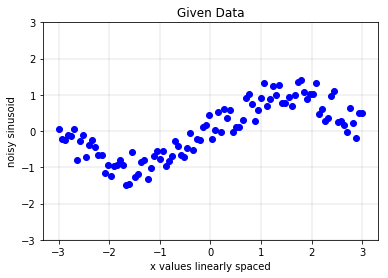

In [8]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.set_title('Given Data')
ax.set_xlabel('x values linearly spaced')
ax.set_ylabel('noisy sinusoid')
ax.grid(color='k', linestyle='-', linewidth=0.1)
ax.set_ylim([-3,3])
plt.scatter(xs, ys,marker='o',color='b')
plt.ion()
plt.show()

Tensorboard :: The 'tf.summary.merge_all()' command merges all the summaries we defined above in the graph and runs in the tensorflow session and then we can write it to a destination folder using 'tf.summary.FileWriter' command 

code ::Initializing the tensorboard session and initializing all the global variables . The next step is run this for all epochs and estimate the training loss and see the fitted data and simultaneously record the summary of the result.  


0.0146249
0.00756378
0.00510717
0.00430329
0.00403695
0.0038883
0.00375621
0.00362393
0.00348999
0.00335512
0.00322038
0.00308669
0.00295488
0.00282563
0.00269954
0.00257706
0.0024586
0.00234447
0.00223491
0.00213011
0.0020302
0.00193527
0.00184535
0.00176046
0.00168057
0.00160563
0.00153555
0.00147023
0.00140956
0.00135339
0.00130157
0.00125394
0.00121031
0.00117051
0.00113434
0.0011016
0.00107209
0.0010456
0.00102193
0.00100087
0.000982221
0.00096578
0.00095135
0.000938739
0.000927762
0.000918244
0.000910017
0.000902925
0.000896823
0.00089158
0.000887077
0.000883207
0.000879876
0.000877004
0.000874522
0.000872366
0.00087049
0.000868848
0.000867406
0.000866132
0.000865003
0.000863996
0.000863096
0.000862286
0.000861556
0.000860894
0.000860292
0.000859742
0.000859239
0.000858777
0.000858351
0.00085796
0.000857597
0.000857261
0.000856949
0.000856659
0.000856389
0.000856137
0.000855902
0.000855682
0.000855477
0.000855284
0.000855104
0.000854935
0.000854776
0.000854627
0.000854487
0.00085

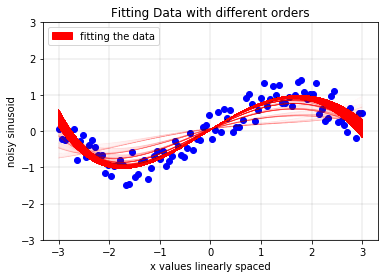

In [9]:
# Tensor Flow Session

nb_epochs=1000
sess= tf.Session()
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter('logs/', sess.graph) 
init=tf.global_variables_initializer()
sess.run(init)
    
for i in range(nb_epochs):
    for (x,y) in zip(xs,ys):
        sess.run(train_step,feed_dict={X:x,Y:y})
        
        if i %10==0:
            result = sess.run(merged,feed_dict={X: x, Y: y})
            writer.add_summary(result,i)
            fitted_data=prediction.eval(feed_dict={X: xs},session=sess)
            ax.plot(xs,fitted_data,'r',alpha =i/nb_epochs,linewidth=0.5)
            plt.draw()
    cost_train=sess.run(loss,feed_dict={X:xs,Y:ys})
    print(cost_train)  
red_patch = mpatches.Patch(color='red', label='fitting the data')
ax.legend(handles=[red_patch])
ax.set_ylim([-3,3])
ax.set_title('Fitting Data with different orders')
ax.grid(color='k', linestyle='-', linewidth=0.1)
fig

# Tensorboard Instructions

Go to command line cd to working directory and type:

working dir/> python CodingChallenge_TensorFlow_Akshay.py

After compiling , logs folder will be generated in working directory

working dir/> tensorboard --logdir=logs
